# Classification in action

## Simple baseline-decision

Датасет: https://www.kaggle.com/miroslavsabo/young-people-survey

In [2]:
import numpy as np
import pandas as pd
import pandas_profiling 

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-colorblind')
%matplotlib inline
plt.rcParams["figure.figsize"] = [14, 10]

%config Completer.use_jedi = False

print("Imports Done!")

Imports Done!


In [3]:
PATH = "~/PycharmProjects/Datasets/"

In [5]:
dataset_origin = pd.read_csv(PATH + "responses.csv")
dataset_origin.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [8]:
dataset_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [9]:
dataset_origin.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


In [10]:
df = dataset_origin.copy()

<AxesSubplot:title={'center':'Missingess Map'}>

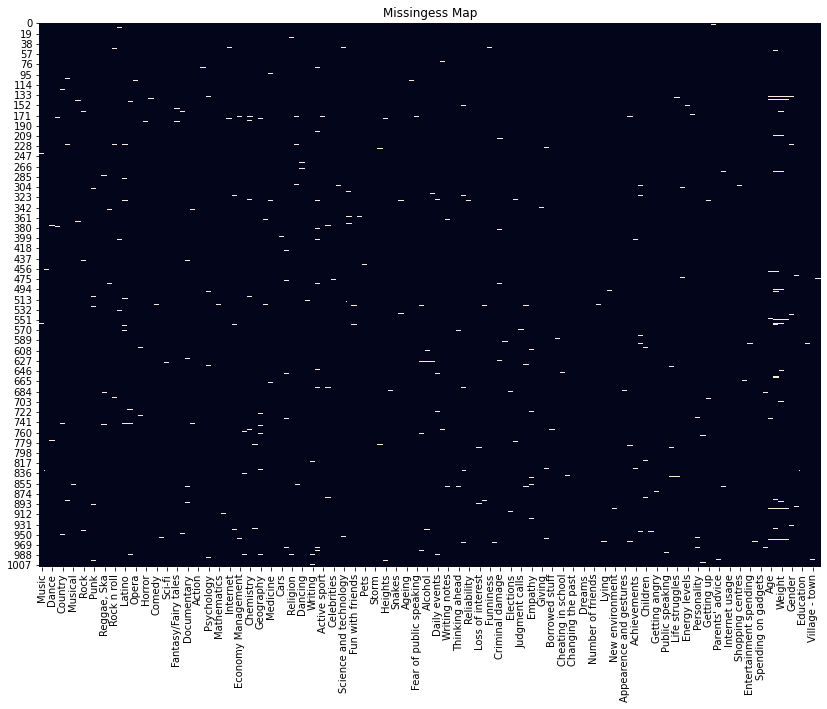

In [11]:
sns.set_palette("GnBu_d")
plt.title("Missingess Map")
plt.rcParams['figure.figsize'] = (8.0, 5.0) #Adjust values as necessary
sns.heatmap(df.isnull(), cbar=False)

<AxesSubplot:ylabel='Count'>

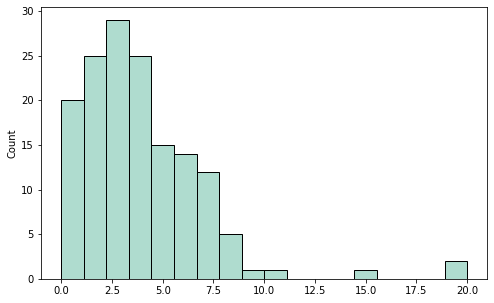

In [16]:
sns.histplot(df.isnull().sum().sort_values(ascending=False))

In [20]:
import rpy2
%load_ext rpy2.ipython

In [23]:
%%R 
library(ggplot2)
library(dplyr)
library(gridExtra)
library(RColorBrewer)
library(ggthemes)
library(gridExtra)
library(qgraph)
library(igraph)
library(bootnet) 
library(dplyr)
library(NetworkComparisonTest)
library(mgm)

R[write to console]: Error in library(qgraph) : there is no package called ‘qgraph’




Error in library(qgraph) : there is no package called ‘qgraph’


In [27]:
%%R 
data <- read.csv("~/PycharmProjects/Datasets/responses.csv")
data2 <- data[,32:63] # Select only variables
names(data2)

R[write to console]: Error in cor_auto(data2) : could not find function "cor_auto"




Error in cor_auto(data2) : could not find function "cor_auto"
